# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset ini saya ambil dari kaggle dimana ada 11 kolom dan 5132 data tentang pasien diabetes dan kesehatannya (https://www.kaggle.com/datasets/miadul/kidney-disease-risk-dataset)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from imblearn.over_sampling import SMOTE

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [87]:
#Type your code here
df = pd.read_csv('..\Diabetes Classification.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Melihat 5 Data Teratas

In [88]:
#Type your code here
df.head()

,Unnamed: 0,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,0,50,F,24,4.2,0.9,2.4,1.4,46.0,4.7,0
1,1,26,M,23,3.7,1.4,1.1,2.1,62.0,4.5,0
2,2,33,M,21,4.9,1.0,0.8,2.0,46.0,7.1,0
3,3,45,F,21,2.9,1.0,1.0,1.5,24.0,2.3,0
4,4,50,F,24,3.6,1.3,0.9,2.1,50.0,2.0,0


## Melihat informasi dataset (9 kolom numerik)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5132 entries, 0 to 5131
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5132 non-null   int64  
 1   Age         5132 non-null   int64  
 2   Gender      5132 non-null   object 
 3   BMI         5132 non-null   int64  
 4   Chol        5132 non-null   float64
 5   TG          5132 non-null   float64
 6   HDL         5132 non-null   float64
 7   LDL         5132 non-null   float64
 8   Cr          5132 non-null   float64
 9   BUN         5132 non-null   float64
 10  Diagnosis   5132 non-null   int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 441.2+ KB


## Melihat statistik dataset

In [90]:
df.describe()

,Unnamed: 0,Age,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
count,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000
mean,2565.500000,48.950312,24.613406,4.866882,1.719328,1.593305,2.914121,71.144800,4.896969,0.388348
std,1481.625121,14.048794,4.277205,1.001052,1.327057,1.038849,0.945423,28.494394,1.689206,0.487422
min,0.000000,20.000000,15.000000,0.000000,0.000000,0.000000,0.300000,4.860753,0.500000,0.000000
25%,1282.750000,36.000000,22.000000,4.190000,0.910000,1.090000,2.290000,58.000000,3.900000,0.000000
50%,2565.500000,49.000000,24.000000,4.800000,1.380000,1.300000,2.790000,70.200000,4.720000,0.000000
75%,3848.250000,59.000000,27.000000,5.460000,2.100000,1.590000,3.400000,81.600000,5.600000,1.000000
max,5131.000000,93.000000,47.000000,11.650000,32.640000,9.900000,9.900000,800.000000,38.900000,1.000000


## mELIHAT DATA kOSONG

In [91]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Gender        0
BMI           0
Chol          0
TG            0
HDL           0
LDL           0
Cr            0
BUN           0
Diagnosis     0
dtype: int64

## Melihat jumlah duplikasi

In [92]:
df.duplicated().sum()

0

## Melihat Nilai Unik Kolom Gender

In [93]:
print(df['Gender'].value_counts())

Gender
M    3256
F    1875
f       1
Name: count, dtype: int64


## Distribusi Kolom Target

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25580\1268680955.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Diagnosis', palette='pastel')


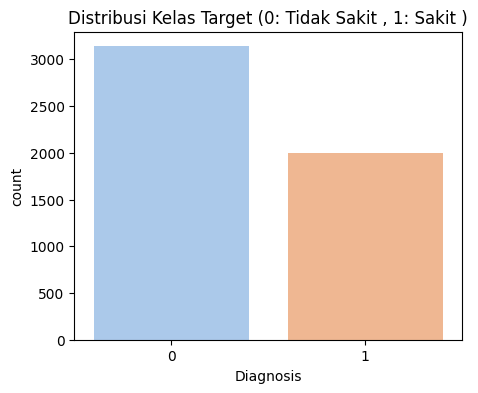

In [94]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Diagnosis', palette='pastel')
plt.title("Distribusi Kelas Target (0: Tidak Sakit , 1: Sakit )")
plt.show()

## Distribusi Data

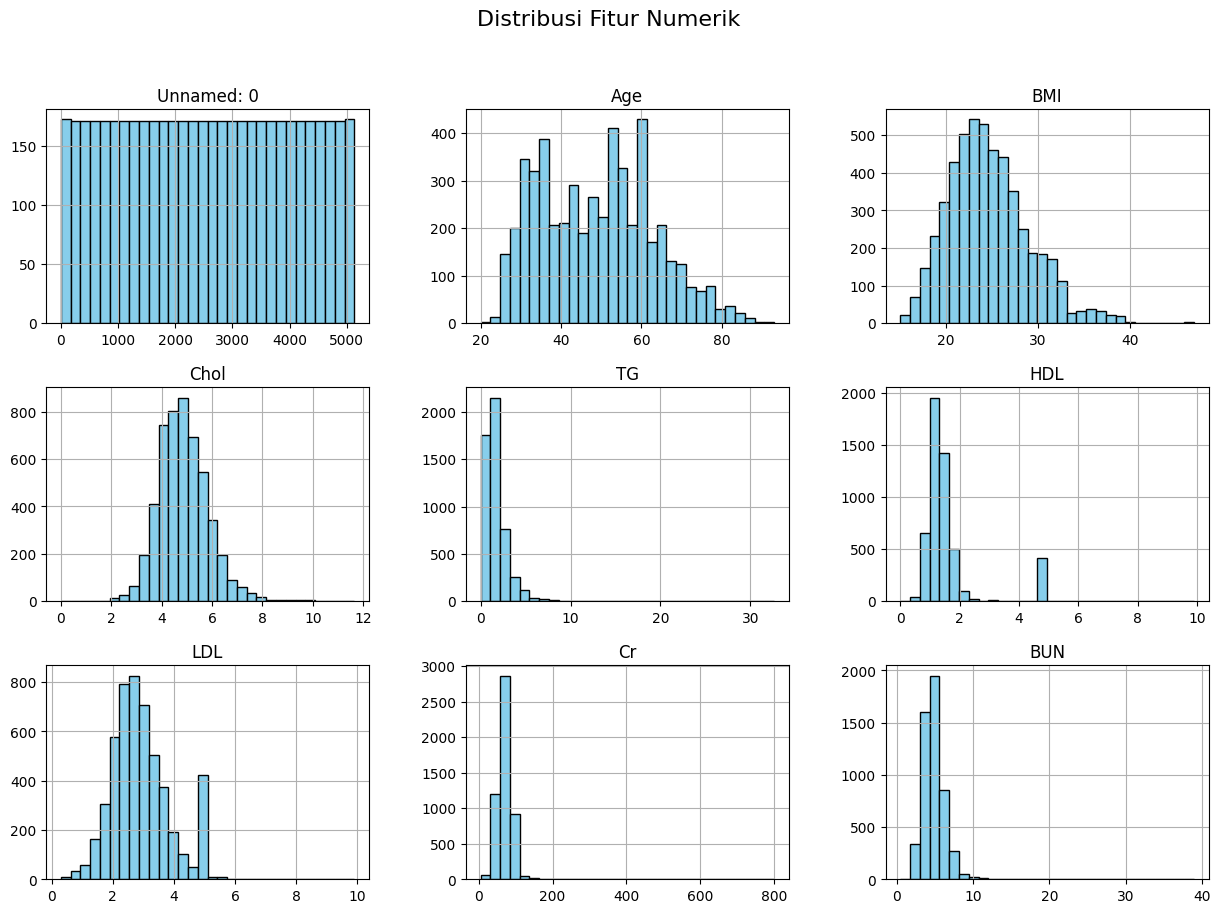

In [95]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_cols.remove('Diagnosis')

df[num_cols].hist(figsize=(15,10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
plt.show()

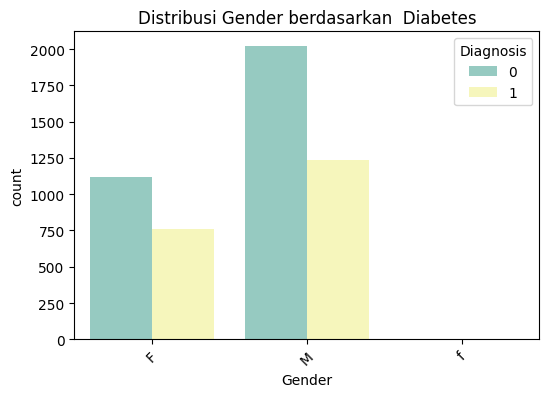

In [96]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Diagnosis', palette='Set3')
    plt.title(f"Distribusi {col} berdasarkan  Diabetes")
    plt.xticks(rotation=45)
    plt.show()

## Melihat Outlier

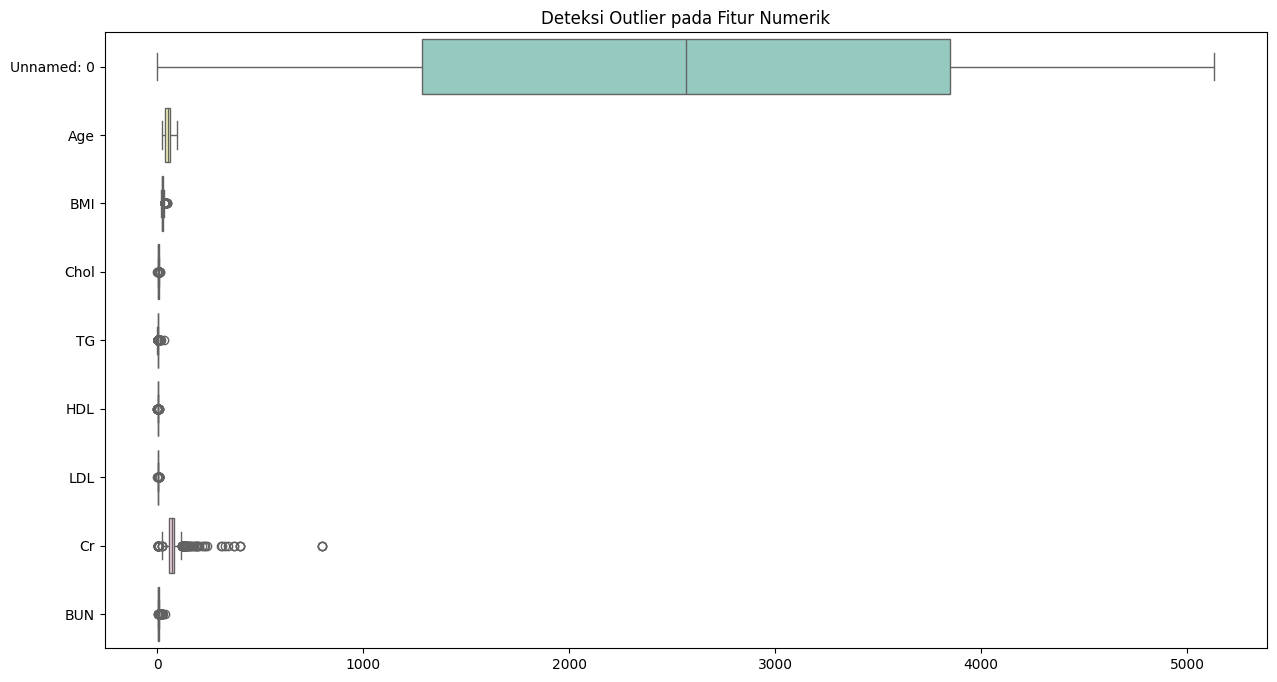

In [97]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df[num_cols], orient='h', palette='Set3')
plt.title("Deteksi Outlier pada Fitur Numerik")
plt.show()

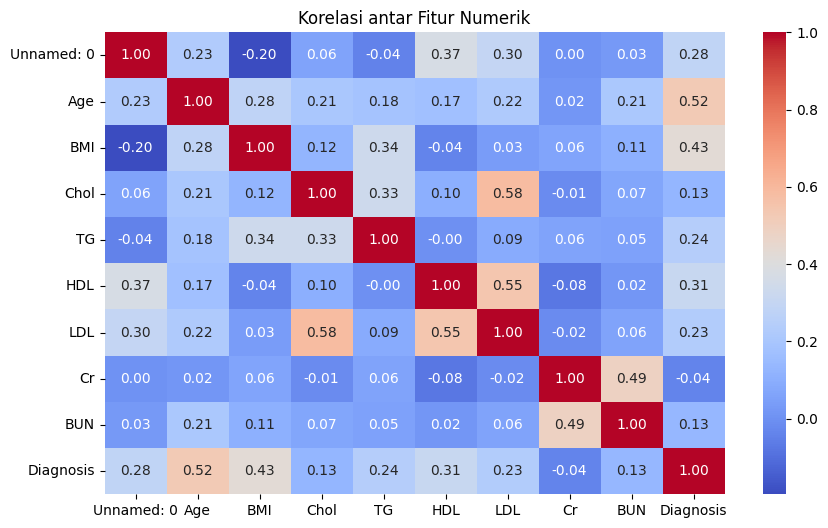

In [98]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols + ['Diagnosis']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antar Fitur Numerik")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Menghapus kolom Unnamed

In [99]:
df = df.drop(columns='Unnamed: 0')

## Menambahkan Data f ke F

In [100]:
df['Gender'].replace('f', 'F', inplace=True)
print(df['Gender'].value_counts())

Gender
M    3256
F    1876
Name: count, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25580\1382622037.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace('f', 'F', inplace=True)


## Melakukan Metode IQR 

In [102]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# 1. Hitung Q1 (Kuartil 1) dan Q3 (Kuartil 3) untuk setiap kolom
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)

# 2. Hitung IQR (Interquartile Range)
IQR = Q3 - Q1

# 3. Tentukan batas bawah dan batas atas
batas_bawah = Q1 - (1.5 * IQR)
batas_atas = Q3 + (1.5 * IQR)

mask = ~((df[num_cols] < batas_bawah) | (df[num_cols] > batas_atas)).any(axis=1)

# 5. Terapkan mask ke DataFrame
df = df[mask].copy()

print(f"Bentuk data setelah outlier dihapus: {df.shape}")


Bentuk data setelah outlier dihapus: (4145, 10)


## ENcoding

In [103]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

## Memisahkan Kolom Target dan Fitur

In [104]:
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

## Melakukan Standarisasi

In [105]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df = pd.DataFrame(X_scaled, columns=X.columns)
df.head()

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN
0,-1.526712,0.757398,-0.256936,-1.237874,-0.070264,-0.672519,-0.927593,-0.523516,-0.190909
1,-1.026056,0.757398,-0.800996,0.133229,-0.589135,-1.657650,-1.069704,-1.546167,2.016932
2,-0.167788,-1.320309,-0.800996,-2.151944,-0.589135,-1.000896,-1.780257,-2.952312,-2.059083
3,0.189823,-1.320309,0.015095,-1.352133,-0.199981,-1.329273,-0.927593,-1.290504,-2.313834
4,0.046779,0.757398,0.015095,-2.151944,-0.848570,-1.329273,-1.638146,-1.482251,-0.021075


## Splitting Data

In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42
)

print("Train set:", X_train.shape)
print("Test set:", X_test.shape)
print("Proporsi kelas di train:", y_train.value_counts(normalize=True))
print("Proporsi kelas di test:", y_test.value_counts(normalize=True))

Train set: (3316, 9)
Test set: (829, 9)
Proporsi kelas di train: Diagnosis
0    0.710796
1    0.289204
Name: proportion, dtype: float64
Proporsi kelas di test: Diagnosis
0    0.711701
1    0.288299
Name: proportion, dtype: float64


In [107]:
print("Distribusi sebelum SMOTE:", np.bincount(y_train))
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Distribusi setelah SMOTE:", np.bincount(y_train_res))

Distribusi sebelum SMOTE: [2357  959]
Distribusi setelah SMOTE: [2357 2357]
